# Endometrium analysis - clusters visualization

In [33]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

    
def Barplot(which_var, adata, var='leiden', height=3, color = False, name = None):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    if name is None:
        ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                           dpi=300, orientation='landscape', format= 'pdf', optimize=True)
    else:
        ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'_'+name+'.pdf', bbox_inches='tight',
                   dpi=300, orientation='landscape', format= 'pdf', optimize=True)
    
    
    
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_organoid_confInhibitors/Donor19'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

scanpy==1.4.4 anndata==0.6.22rc1 umap==0.3.10 numpy==1.17.5 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data organoid

In [34]:
adata = sc.read('data/organoids-confI_Donor19.h5ad')

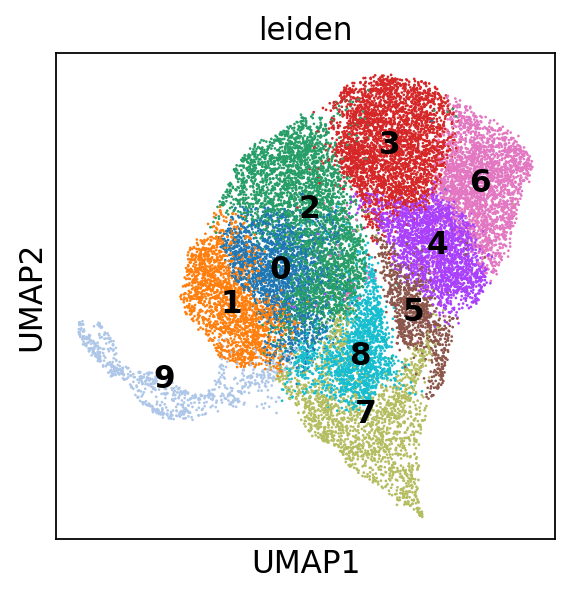

In [35]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')

Rename meta
- XAV → XAV939


In [36]:
adata.obs.Inhibition.values.describe()

counts     freqs
categories                  
N/I          16609  0.813728
NOTCH-DBZ     2516  0.123267
WNT-XAV       1286  0.063005

In [37]:
adata.obs['Inhibition'] = adata.obs['Inhibition'].tolist()
adata.obs.at[adata.obs['Inhibition'] == 'WNT-XAV', 'Inhibition'] = 'WNT-XAV939'

... storing 'Inhibition' as categorical


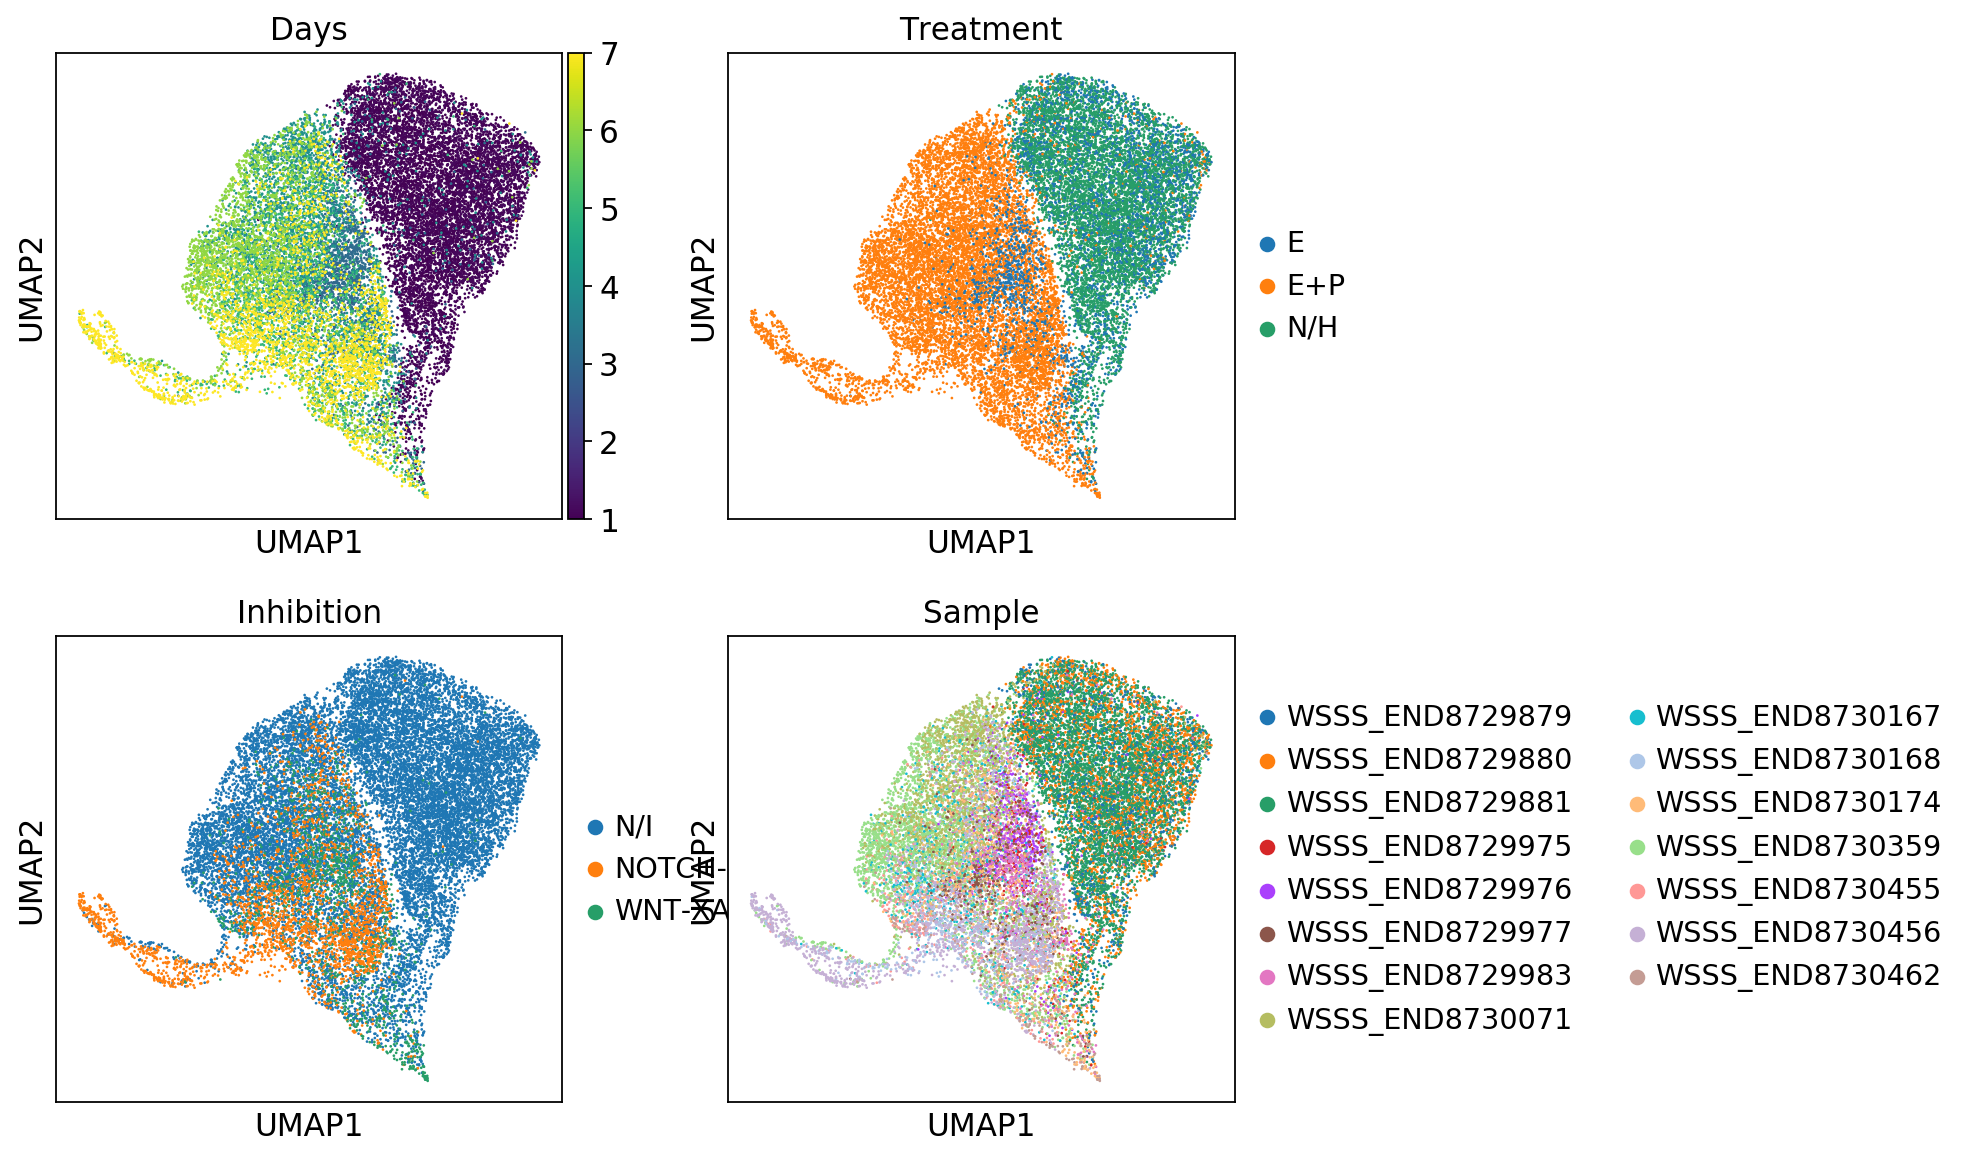

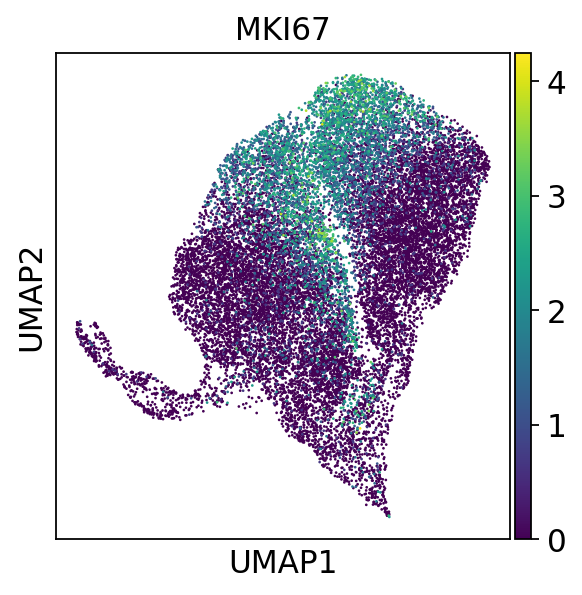

In [38]:
sc.pl.umap(adata, color=['Days', 'Treatment',  'Inhibition', 'Sample'], save='_meta.pdf', ncols = 2)
sc.pl.umap(adata, color=['MKI67'],ncols = 2)

### Transfer labels from figure 4

In [39]:
noIn_clusters = pd.read_csv('figures_both_organoid/barcode_metadata.csv')
noIn_clusters = noIn_clusters.set_index('index')
noIn_clusters.head()
bc2cl = dict(zip(noIn_clusters.index, noIn_clusters.clusters2))

Trying to set attribute `.obs` of view, making a copy.
... storing 'clusters_noIn' as categorical


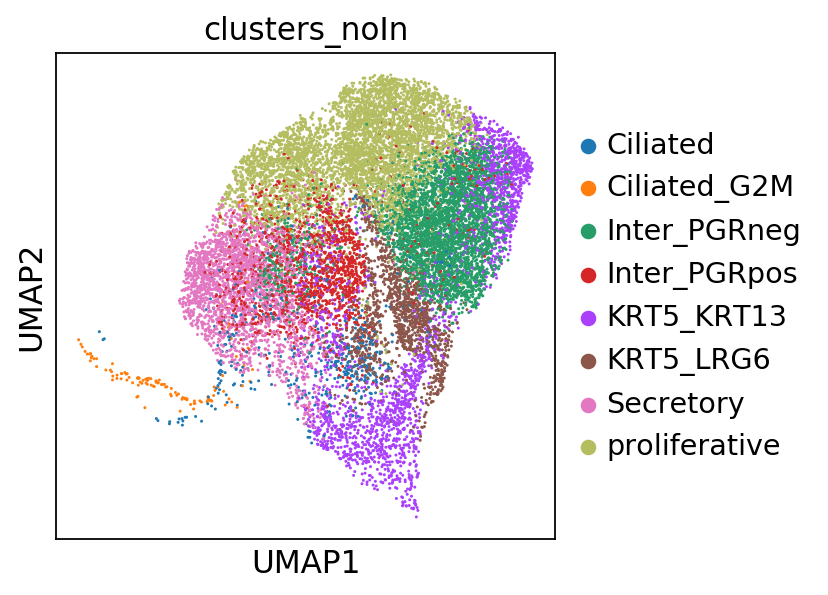

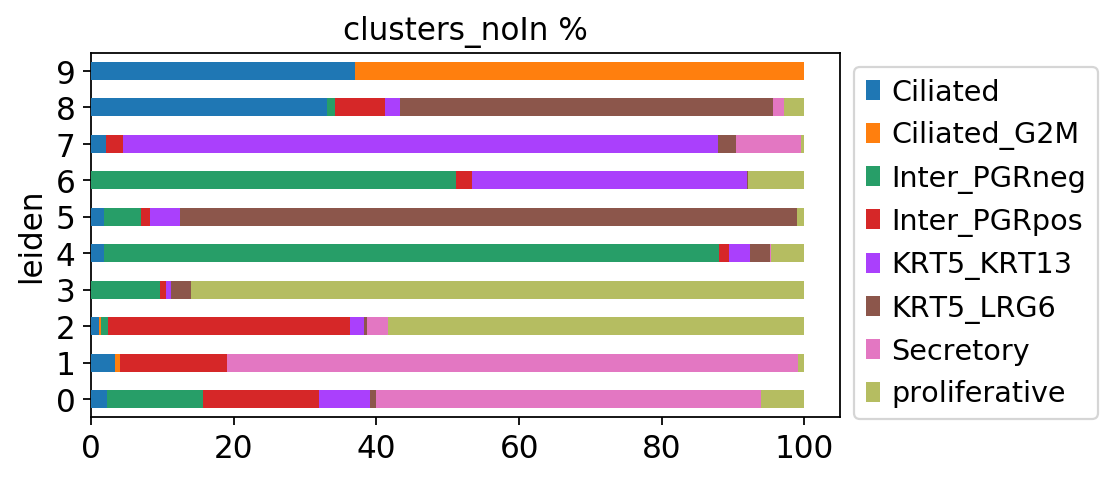

In [40]:
adata.obs[ 'clusters_noIn'] = [bc2cl[i] if i in noIn_clusters.index else 'inhibitor' for i in adata.obs_names ]
sc.pl.umap(adata[[ i not in ['inhibitor'] for i in adata.obs['clusters_noIn']]] , color=['clusters_noIn'])
Barplot('clusters_noIn', adata[[ i not in ['inhibitor'] for i in adata.obs['clusters_noIn']]])

# Figures - paper

0 = int_PGRpos
1 = proliferative
2 = proliferative
3 = int_PGRneg 
4 = KRT5_LGR6
5 = int_PGRneg
6 = KRT5_KRT13
7 = int
8 = ciliated



... storing 'clusters_noIn' as categorical
... storing 'clusters' as categorical
... storing 'clusters2' as categorical


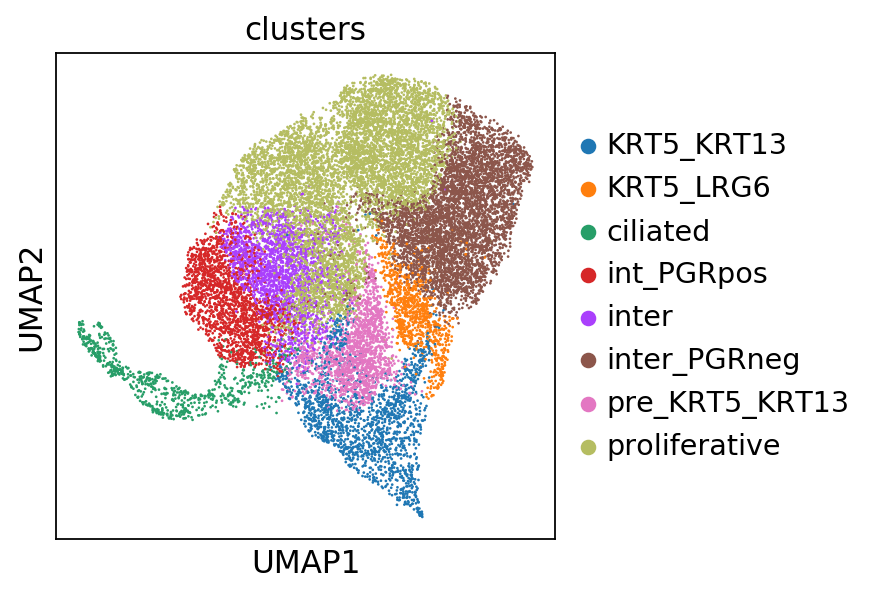

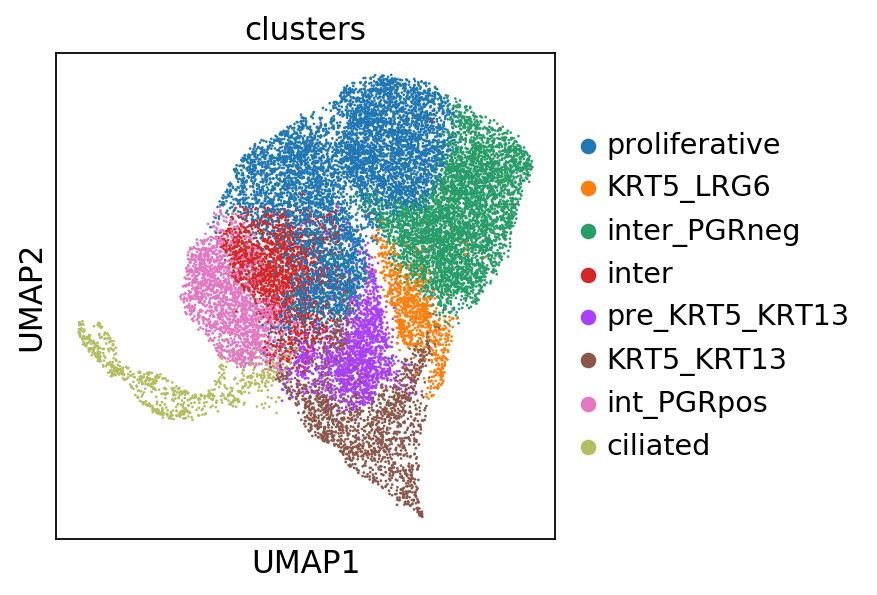

In [41]:
adata.obs['clusters'] = adata.obs['leiden'].tolist()

adata.obs.at[adata.obs['clusters'] == '0', 'clusters'] = 'inter'
adata.obs.at[adata.obs['clusters'] == '1', 'clusters'] = 'int_PGRpos'
adata.obs.at[adata.obs['clusters'] == '2', 'clusters'] = 'proliferative'
adata.obs.at[adata.obs['clusters'] == '3', 'clusters'] = 'proliferative'
adata.obs.at[adata.obs['clusters'] == '4', 'clusters'] = 'inter_PGRneg'
adata.obs.at[adata.obs['clusters'] == '5', 'clusters'] = 'KRT5_LRG6'
adata.obs.at[adata.obs['clusters'] == '6', 'clusters'] = 'inter_PGRneg'
adata.obs.at[adata.obs['clusters'] == '7', 'clusters'] = 'KRT5_KRT13'
adata.obs.at[adata.obs['clusters'] == '8', 'clusters'] = 'pre_KRT5_KRT13'
adata.obs.at[adata.obs['clusters'] == '9', 'clusters'] = 'ciliated'


adata.obs['clusters2'] = adata.obs['clusters']
sc.pl.umap(adata, color=['clusters'])
adata.obs['clusters'].cat.reorder_categories(['proliferative', 'KRT5_LRG6',  'inter_PGRneg', 'inter', 'pre_KRT5_KRT13', 'KRT5_KRT13', 
                                               'int_PGRpos','ciliated'], inplace=True)
sc.pl.umap(adata, color=['clusters'])

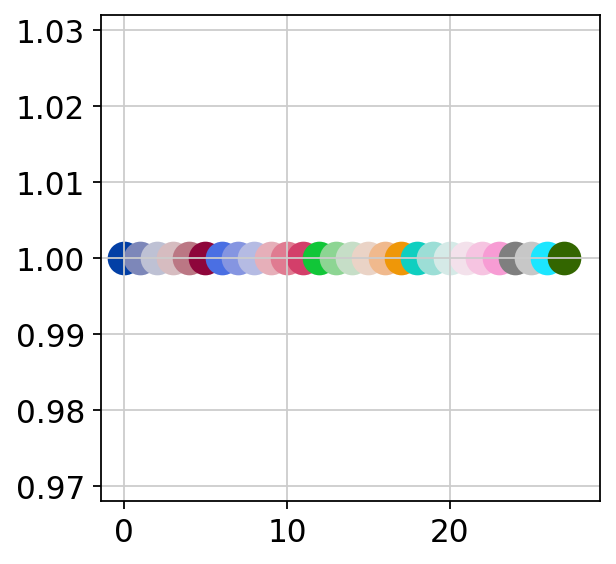

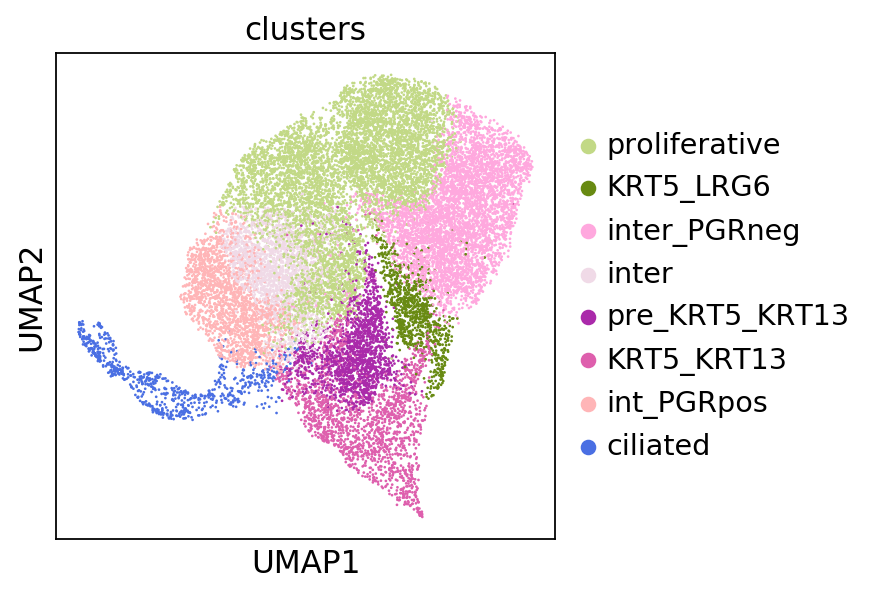

array(['#c2d986', '#688a12', '#ffa8de', '#f0dae7', '#aa2aaa', '#de5fad',
       '#ffb5b7', '#4a6fe3', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1', '#f79cd4',
       '#7f7f7f', '#c7c7c7', '#1CE6FF', '#336600'], dtype='<U7')

In [42]:
import matplotlib.pyplot as pl

for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_26[i], s=200)
pl.show()
orig_colors = np.array(sc.pl.palettes.zeileis_26)
new_colors = orig_colors.copy()


new_colors[[7]] = orig_colors[[6]]

new_colors[[6]] = '#ffb5b7'

new_colors[[5]] = '#de5fad'
new_colors[[4]] = '#aa2aaa'

new_colors[[3]] = '#f0dae7'
new_colors[[2]] = '#ffa8de'
new_colors[[1]] = '#688a12'
new_colors[[0]] = '#c2d986'


# new_colors[[4]] = '#ffb5b7'



adata.uns['clusters_colors'] = new_colors
sc.pl.umap(adata, color=['clusters'], save='_annotatedClusters.pdf')
new_colors

### Write and plot metadata

In [43]:
stats = adata.obs.clusters.values.describe()
stats.to_csv(str(sc.settings.figdir)+'/clusterAnnotated_stats_organoids.csv')
adata.obs.to_csv(str(sc.settings.figdir)+'/barcode_metadata.csv')

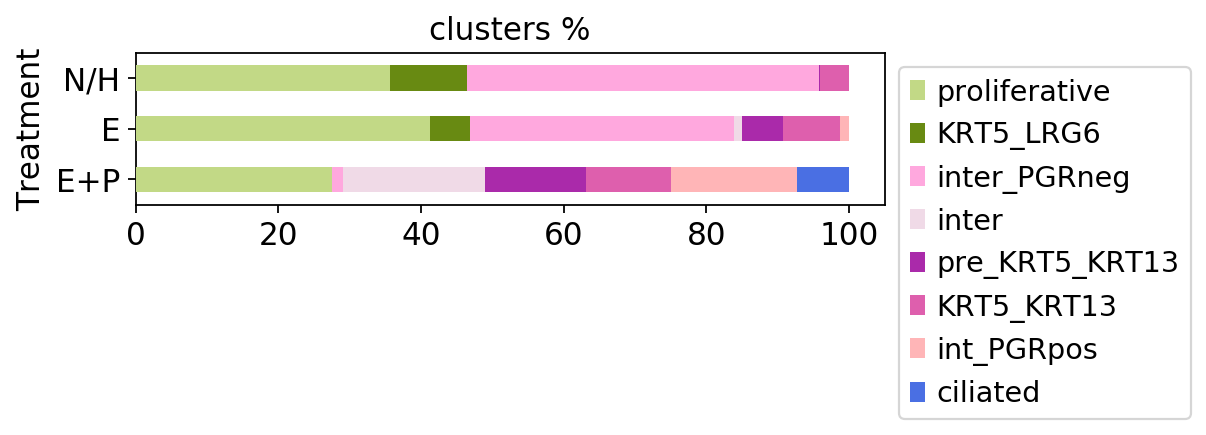

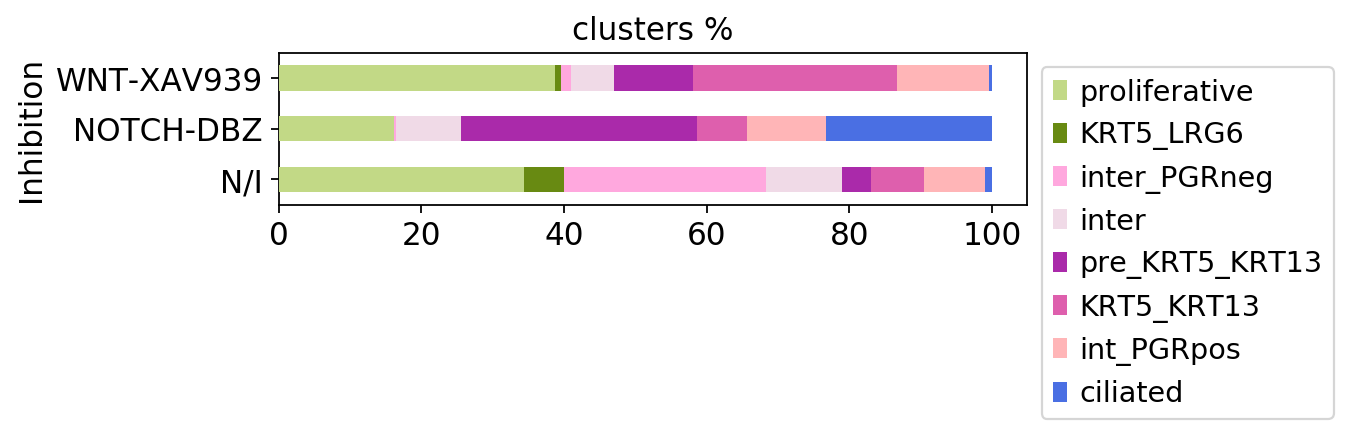

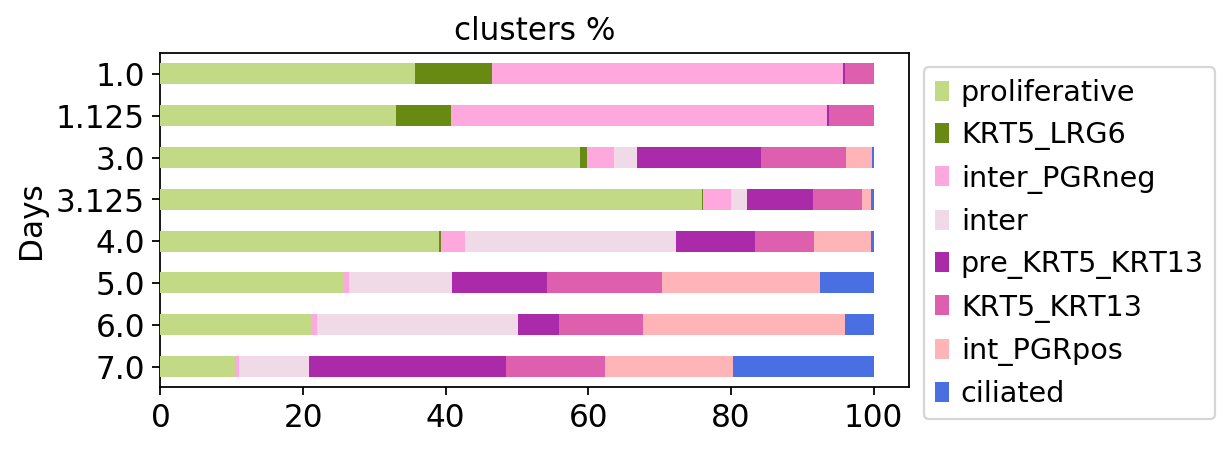

In [44]:
adata.obs['Treatment'].cat.reorder_categories(['E+P', 'E', 'N/H'], inplace=True)
Barplot('clusters', adata, 'Treatment', color = adata.uns['clusters_colors'], height = 1.25)
Barplot('clusters', adata, 'Inhibition', color = adata.uns['clusters_colors'], height = 1.25)
adata.obs['Days'] = adata.obs['Days'].astype('category')
adata.obs['Days'].cat.reorder_categories(adata.obs['Days'].cat.categories.sort_values(ascending=False), inplace=True)
Barplot('clusters', adata, 'Days', color = adata.uns['clusters_colors'], height = 2.75)

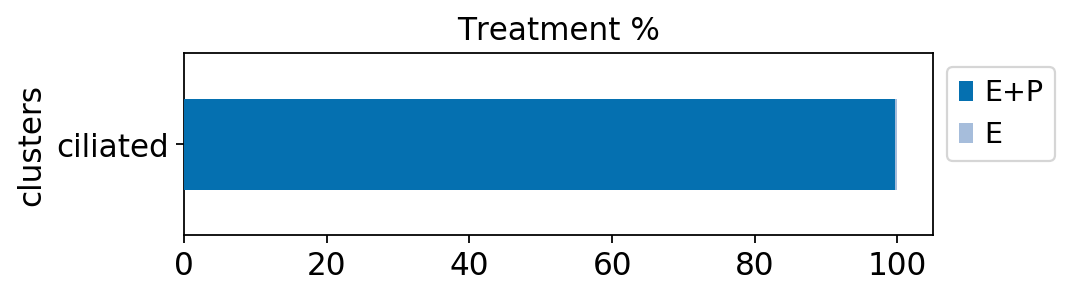

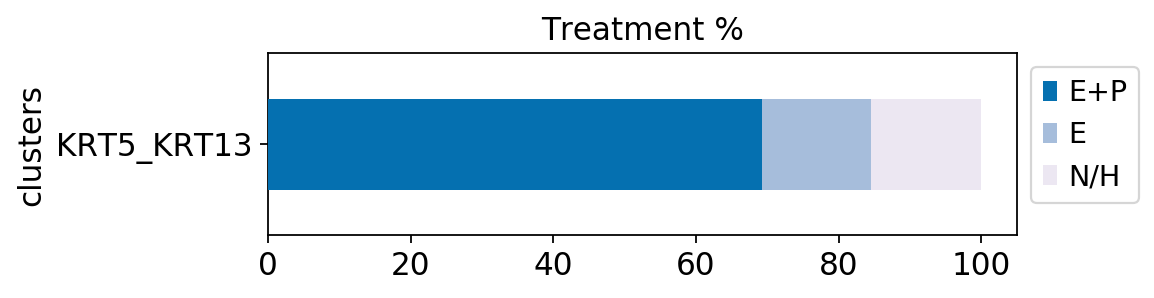

In [52]:
Barplot('Treatment', adata[[ i == 'ciliated' for i in adata.obs.clusters]], 'clusters', 
        color = ['#0570b0',  '#a6bddb', '#ece7f2'] , height = 1.5, name = 'ciliated')
Barplot('Treatment', adata[[ i == 'KRT5_KRT13' for i in adata.obs.clusters]], 'clusters', 
        color = ['#0570b0',  '#a6bddb', '#ece7f2'] , height = 1.5, name = 'KRT5_KRT13')

# Save Seurat

In [46]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
adata_count.obsm['X_umap'] = adata.obsm['X_umap']
adata_count.var['is_HVG'] = [i in adata.var_names for i in adata_count.var_names ]
adata_count.write('data/organoids-confI_Donor19_forSeurat.h5ad')
# adata_count.write('data/organoids-confI_Donor44_forSeurat.h5ad')
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4, copy=True)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count)

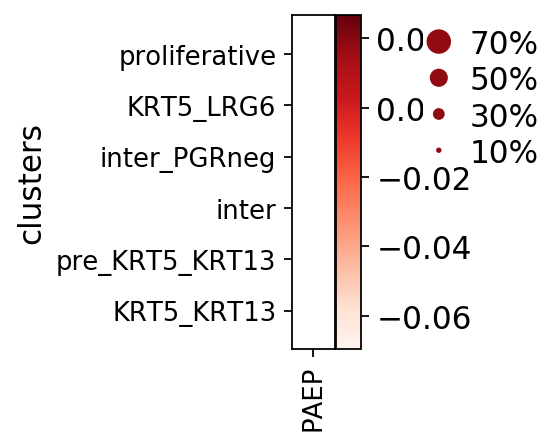

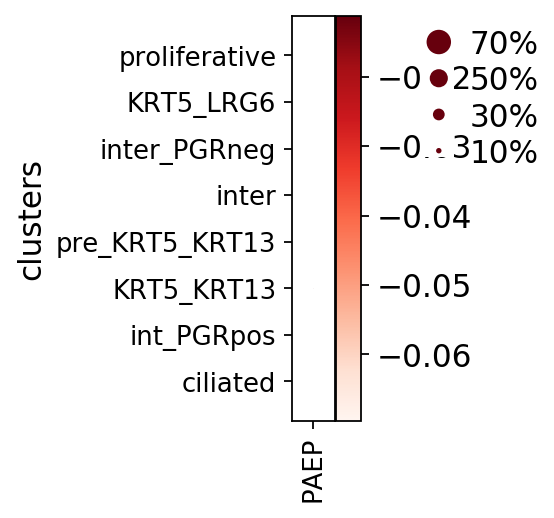

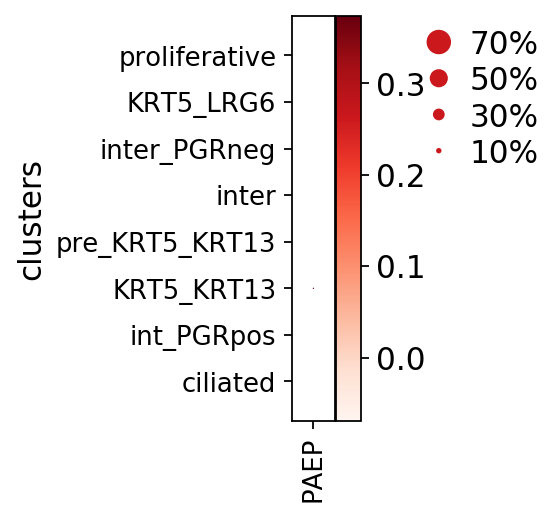

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [47]:
sc.pl.dotplot(adata_count[[ i == 'N/H' for i in adata_count.obs.Treatment]], ['PAEP'], groupby='clusters', 
              dendrogram=False, dot_max=0.7, dot_min=0, save= '_PAEP_NH.pdf')
sc.pl.dotplot(adata_count[[ i == 'E' for i in adata_count.obs.Treatment]], ['PAEP'], groupby='clusters', 
              dendrogram=False, dot_max=0.7, dot_min=0, save= '_PAEP_E.pdf')
sc.pl.dotplot(adata_count[[ i == 'E+P' for i in adata_count.obs.Treatment]], ['PAEP'], groupby='clusters', 
              dendrogram=False, dot_max=0.7, dot_min=0, save= '_PAEP_EP.pdf')

In [48]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4, copy=True)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count)

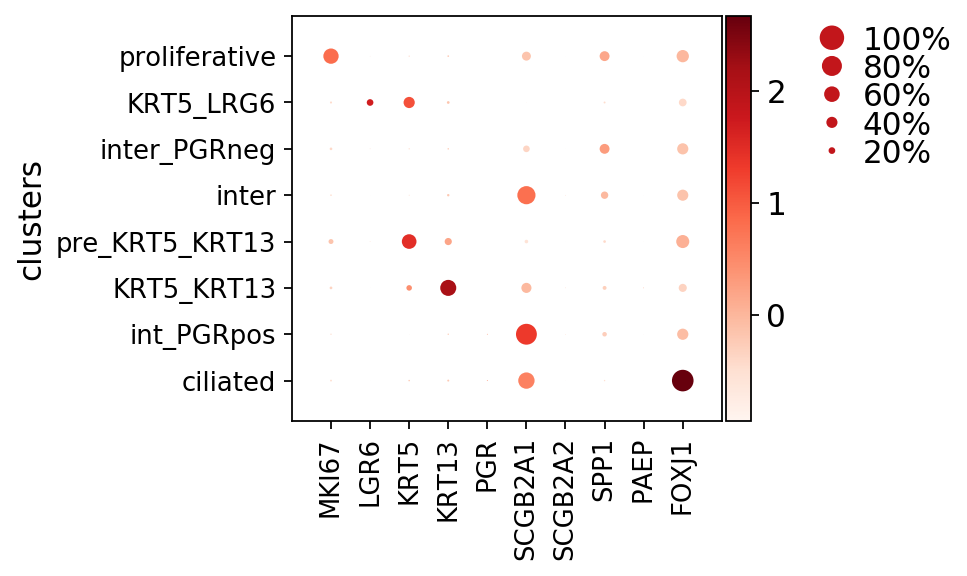

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.5, 0, 0.2, 0.5, 0.25])

In [49]:
markers = ['MKI67', 'LGR6', 'KRT5', 'KRT13', 'PGR', 'SCGB2A1', 'SCGB2A2', 'SPP1', 'PAEP', 'FOXJ1']
sc.pl.dotplot(adata_count, markers, groupby='clusters', 
              dendrogram=False, dot_min=0, save= '_markers.pdf')


## Plot Markers

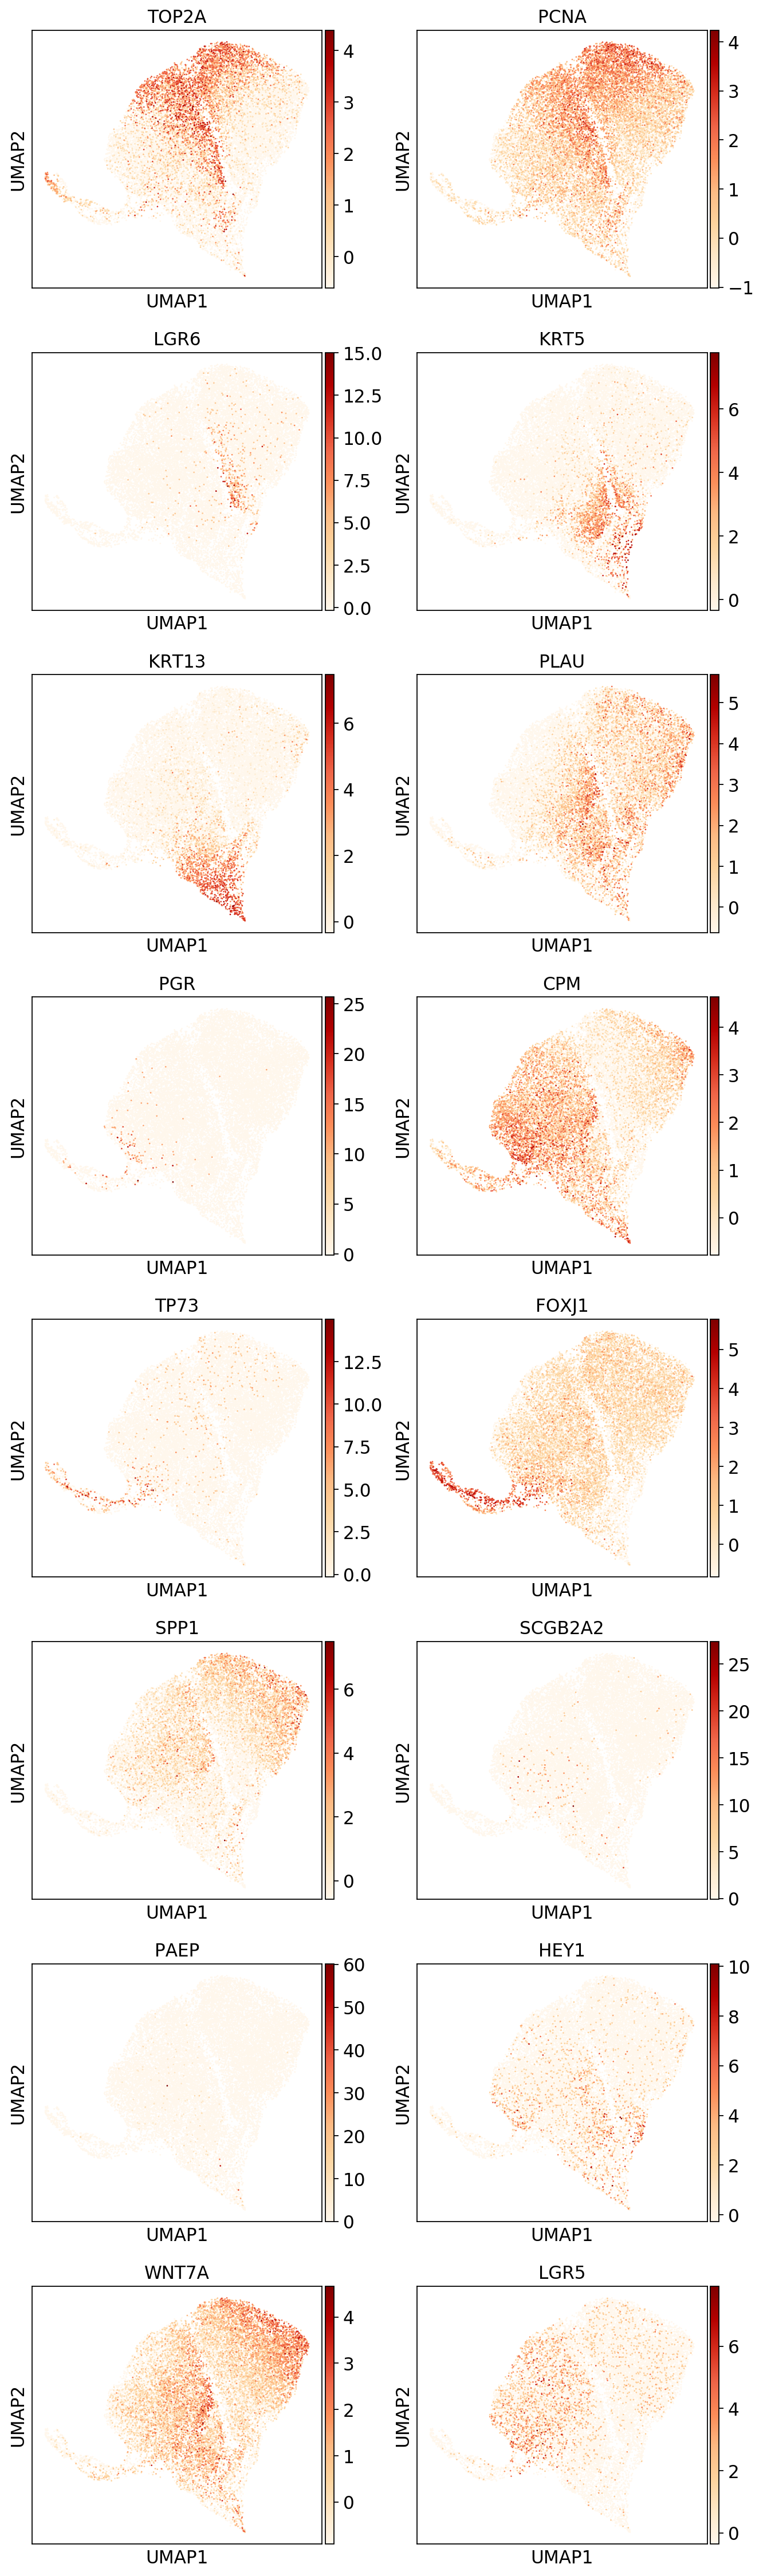

In [51]:
adata_count.obsm['X_umap'] = adata.obsm['X_umap']
markers = ['TOP2A', 'PCNA', 
           'LGR6', 'KRT5',
           'KRT13', 'PLAU', #'PLAUR', 
           'PGR', 'CPM',
           'TP73', 'FOXJ1',
           'SPP1', 'SCGB2A2', 
           'PAEP', 'HEY1',
           'WNT7A','LGR5'
#             'SOX9', 'MMP7', 
#             'PIFO', 'RSPH1',
#            'SERPINA1'
          ]
sc.pl.umap(adata_count, color=markers, save='-markers_figure.pdf',color_map='OrRd', ncols=2)  

# Finding marker genes


### All vs rest

#### scanpy

In [ ]:
# marker calling
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
# sc.pp.scale(adata_count)
sc.tl.rank_genes_groups(adata_count, groupby='clusters', n_genes=50000, use_raw=False) #, method='logreg'

In [ ]:
#marker visualisation
sc.pl.rank_genes_groups(adata_count, n_genes=20, save='.pdf')
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=15, dendrogram=False, save='.pdf')

In [ ]:
result = adata_count.uns['rank_genes_groups']

adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)

os.system('mkdir -p '+str(sc.settings.figdir)+'/cluster_markers/')
os.system('rm '+str(sc.settings.figdir)+'/cluster_markers/*scanpy*.csv')

for group in result['names'].dtype.names:
    print(group)
    adata_clus = adata_count[adata.obs['clusters'] == group]
    adata_rest = adata_count[[not i for i in adata.obs['clusters']==group]]
    mask = (result['pvals_adj'][group]<=1) & (result['scores'][group]>0)
    markdict = {'gene_'+key: result[key][group][mask] for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']}
    adata_clus = adata_clus[:,markdict['gene_names']]
    adata_rest = adata_rest[:,markdict['gene_names']]
    markdict['mean_cluster'] = np.asarray(np.mean(adata_clus.X,axis=0)).reshape(-1)
    markdict['mean_rest'] = np.asarray(np.mean(adata_rest.X,axis=0)).reshape(-1)
    markdict['log2_FC'] = np.asarray(np.log2(markdict['mean_cluster']/markdict['mean_rest'])).reshape(-1)
    #are you expressed?
    adata_clus.X = adata_clus.X > 0
    adata_rest.X = adata_rest.X > 0
    markdict['percent_cluster'] = np.asarray(100*np.sum(adata_clus.X,axis=0)/adata_clus.shape[0]).reshape(-1)
    markdict['percent_rest'] = np.asarray(100*np.sum(adata_rest.X,axis=0)/adata_rest.shape[0]).reshape(-1)
    df = pd.DataFrame(markdict)
    df.rename(columns={'gene_names':'Gene',
                       'gene_logfoldchanges':'logFC',
                       'log2_FC':'log2_FC',
                       'gene_pvals':'P.Value',
                       'gene_pvals_adj':'adj.P.Val',
                       'mean_cluster':'mean_cluster',
                       'mean_rest':'mean_rest'},
              inplace=True)
    df.to_csv(str(sc.settings.figdir)+'/cluster_markers/'+group+'_scanpy_DEGs.csv')

### Scanpy on TF-IDF values

In [ ]:
adata_bin = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)

import episcanpy as epi
epi.pp.binarize(adata_bin, copy=False)
adata_bin.X.shape


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

tfidf = transformer.fit_transform(adata_bin.X.T)
adata_bin.X = tfidf.T
adata_bin.X.shape

In [ ]:
sc.tl.rank_genes_groups(adata_bin, groupby='clusters', n_genes=50000, use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups(adata_bin, n_genes=20, save='_tfidf.pdf')
sc.pl.rank_genes_groups_dotplot(adata_bin, n_genes=20, dendrogram=False, save='_tfidf_DEscanpy.pdf')

In [ ]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
adata_count.uns['rank_genes_groups'] = adata_bin.uns['rank_genes_groups']

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=15, dendrogram=False, save='_tfidf_DEscanpy.pdf')

#### DE with limma

Prepare object to run limma

In [ ]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs)
sc.pp.filter_genes(adata_count, min_cells=50)
sc.pp.filter_cells(adata_count, min_genes=500)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
print(adata_count.X.shape)

In [ ]:
t = adata_count.X.toarray().T
df = pd.DataFrame(data=t, columns= adata_count.obs.index, index=adata_count.var_names)

In [ ]:
meta_df = pd.DataFrame(data={'Cell':list(adata.obs.index),
                             'cell_type':[ str(i) for i in adata.obs['clusters']],
                             'sample':[ str(i) for i in adata.obs['Donor']],
                             'covariate':[ i for i in adata.obs['Donor']]})
meta_df.head()

In [ ]:
outpath = str(sc.settings.figdir)+'/cluster_markers/'

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R -i df -i meta_df -i outpath

library(limma)
library(edgeR)
options(expressions = 5e5)

# Format
ex_mat=as.matrix(df)
rownames(meta_df) = meta_df$Cell


# Shared cells
rownames(meta_df) = gsub('-', '.', rownames(meta_df))
shared_cells = intersect(rownames(meta_df), colnames(ex_mat))
print(rownames(meta_df)[1:3])
print(colnames(ex_mat)[1:3])
message(length(shared_cells), ' shared cells')
ex_mat = ex_mat[, shared_cells]
meta_df = meta_df[shared_cells,]

# Filter low expressed genes
keep = aveLogCPM(ex_mat) > 0
ex_mat = ex_mat[ keep, ]

# Extract celltypes
cells = rownames(meta_df)
celltypes = unique(meta_df$cell_type)


# For each cluster, make cluster vs rest comparison
for (celltype in celltypes){
    message(celltype)
    
    # Extract cells in cluster and rest
    cells_cluster = rownames(subset(meta_df, cell_type == celltype))
    cells_rest = rownames(subset(meta_df, cell_type != celltype))
    
    # build cluster_type vector
    cluster_type = rep(0, length(cells))
    names(cluster_type) = cells
    cluster_type[ cells_cluster ] = 'cluster'
    cluster_type[ cells_rest ] = 'rest'
    
    design.matrix <- model.matrix(~ 0 + cluster_type)
    
    # Now tell limma how do you want to compare (i.e. cluster vs rest rest)
    contrast.matrix <- makeContrasts(clVSrest = cluster_typecluster - cluster_typerest, levels = design.matrix)

    # Make model and run contrasts
    fit <- lmFit(ex_mat, design.matrix)
    fit <- contrasts.fit(fit, contrast.matrix)
    fit <- eBayes(fit)
    
    # Make a dataframe containing the important data
    results = topTable(fit, adjust="fdr", number = nrow(ex_mat), coef = 'clVSrest')
    
    # Add and filter needed data
    results$Gene = rownames(results)
    results = results[ , c('Gene', 'logFC', 'P.Value', 'adj.P.Val')]
    results$AveExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, mean)
    results$AveExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, mean)
    results$percentExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, function(x) sum(c(x > 0)+0) ) / length(cells_cluster)
    results$percentExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, function(x) sum(c(x > 0)+0) ) / length(cells_rest)
    
    results$AveExpr_cluster = round(results$AveExpr_cluster, 6)
    results$AveExpr_rest = round(results$AveExpr_rest, 6)
    results$percentExpr_cluster = round(results$percentExpr_cluster, 6)
    results$percentExpr_rest = round(results$percentExpr_rest, 6)
    # and store it as csv file
    write.csv(results, file = paste0(outpath, celltype, '_DEGs.csv'), row.names = F, col.names = T, quote = F)
    
}